In [1]:
import numpy as np
import cv2 as cv
from skimage import io
import matplotlib.pyplot as plt

Possible approaches:
- Gradients (x&y -> vector field, others?)
- Edge detection
- Segmentation
- Depth estimation https://github.com/isl-org/MiDaS/blob/master/tf/README.md

In [5]:
file = '../../images_test/bunny.jpg'
photo = io.imread(file)

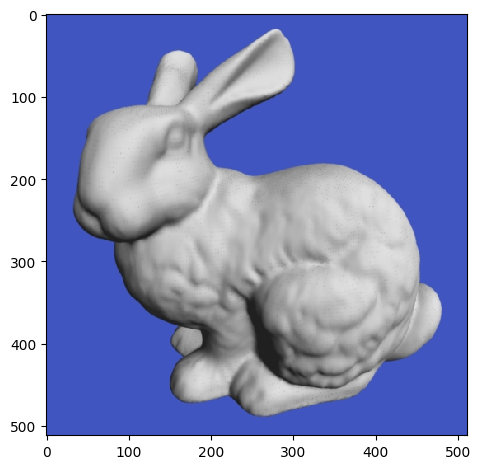

In [11]:
io.imshow(photo)

Models taken from https://github.com/isl-org/MiDaS/blob/master/tf/README.md


**Credits:**\
René Ranftl, Katrin Lasinger, David Hafner, Konrad Schindler and Vladlen Koltun \
Towards Robust Monocular Depth Estimation: Mixing Datasets for Zero-shot Cross-dataset Transfer \
IEEE Transactions on Pattern Analysis and Machine Intelligence (TPAMI) \
2020

In [6]:
# model = cv.dnn.readNet('model-small.onnx')
model = cv.dnn.readNet('model-f6b98070.onnx') # Model too big for the repository, get it online

# input_size = (256, 256)
input_size = (384, 384)

In [7]:
blob = cv.dnn.blobFromImage(photo, scalefactor=1/255., size=input_size, mean=np.mean(photo, (0,1)), swapRB=True, crop=False, ddepth=cv.CV_32F) 

In [8]:
model.setInput(blob)
output = model.forward()

In [20]:
depth = cv.resize(output[0], photo.shape[:2])
depth = cv.normalize(depth, None, 0, 1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)

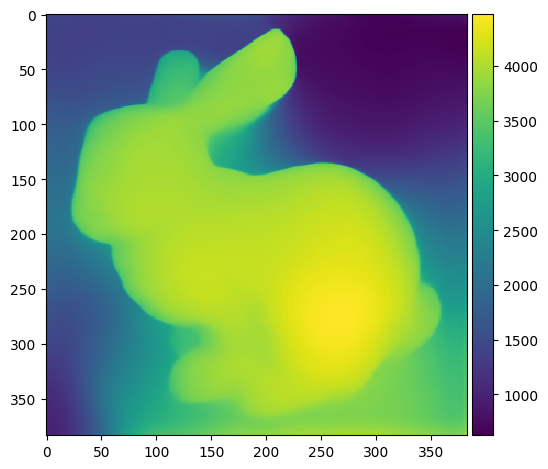

In [21]:
io.imshow(output[0])

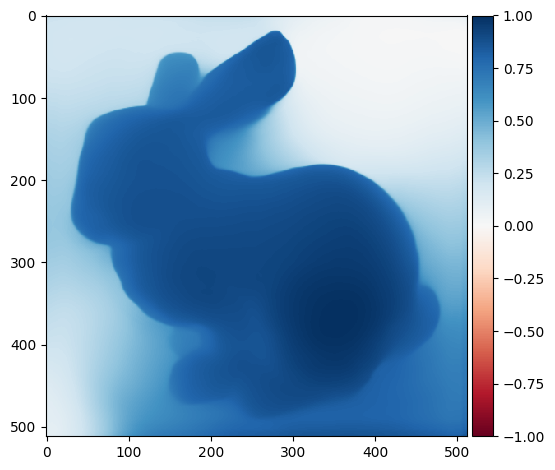

In [22]:
io.imshow(depth)

In [29]:
depth_16bit = (depth * 65535).astype(np.uint16)
io.imsave("depth_estim.png", depth_16bit)